In [9]:
import numpy as np
import matplotlib.pyplot as plt

#noisy weight measurements
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day
scale_factor = 4.0/10

In [7]:
def predict_weight_using_guess(estimation, gain_rate):
    
    estimated, predicted = [estimation], []
    for z in weights:
        #make prediction according to system
        prediction = estimation + gain_rate * time_step
        
        #update filter
        estimation = (1 - scale_factor) * prediction + scale_factor * z
        estimated.append(estimation)
        predicted.append(prediction)
    
    return estimated, predicted

In [18]:
init_weight_estimation = 160.

ground_truth= [160 + x for x in range(len(weights))]

estimations, predictions = predict_weight_using_guess(init_weight_estimation, 1)

plt.figure(figsize=(12,9))
plt.plot(ground_truth, color = 'black', label = 'True Signal')
plt.plot(estimations, linestyle = '--', color = 'green', label = "Estimation")
plt.plot([None] + predictions, linestyle = '-', color  = 'blue',label ='Prediction')
plt.xlabel('Day')
plt.ylabel("Lbs")
plt.legend()
plt.show()

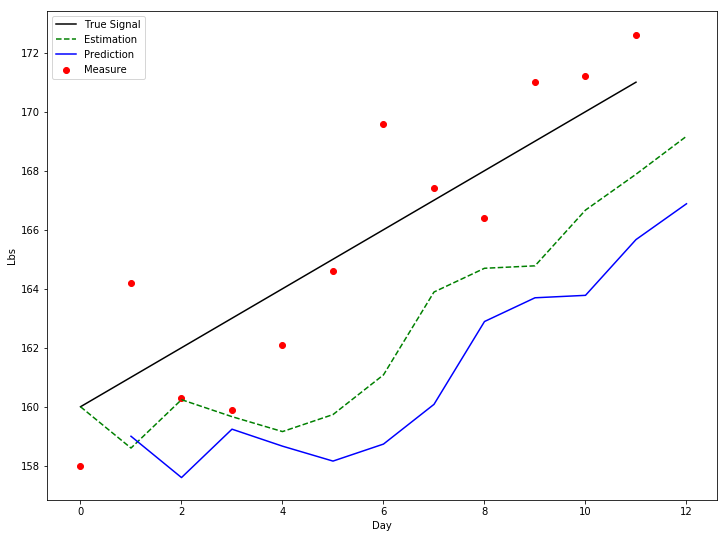

In [29]:
# bad initial guess
init_weight_estimation = 160.
estimations, predictions = predict_weight_using_guess(init_weight_estimation, -1)

plt.figure(figsize=(12,9))
plt.plot(ground_truth, color = 'black', label = 'True Signal')
plt.scatter(range(len(weights)) , weights, color = 'red', label = 'Measure')
plt.plot(estimations, linestyle = '--', color = 'green', label = "Estimation")
plt.plot([None] + predictions, linestyle = '-', color  = 'blue',label ='Prediction')
plt.xlabel('Day')
plt.ylabel("Lbs")
plt.legend()
plt.show()